In [1]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os; import sys
import numpy as np
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
# MPC import
from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis, plot_static_states_inputs

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")

rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

In [3]:
# Bring over from part 4 for comparison
from Deliverable_4_1.LinearMPC_4_1.MPCVelControl import MPCVelControl

Ts = 0.05
sim_time = 15
H = 5.0
x0 = np.array([0, 0, 0, 0, 0, 0, 5, 5, 10, 0, 0, 1])  # initial state
x_target = np.zeros((12,))

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

# Static mass change and zero fuel rate
rocket.mass = 1.5
rocket.fuel_rate = 0.0
t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, ref = rocket.simulate_control(mpc, sim_time, H, x0, x_target=x_target, method='nonlinear')


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Maximum invariant set successfully computed after 7 iterations:
  Dimension: 3
Maximum invariant set successfully computed after 7 iterations:
  Dimension: 3
Maximum invariant set successfully computed after 1 iterations:
  Dimension: 1
Maximum invariant set successfully computed after 34 iterations:
  Dimension: 2
Simulating time 0.00: 

c:\Users\linhp\miniforge3\envs\mpc2025\Lib\site-packages\cvxpy\problems\problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(



Simulating time 0.05: 
Simulating time 0.10: 
Simulating time 0.15: 
Simulating time 0.20: 
Simulating time 0.25: 
Simulating time 0.30: 
Simulating time 0.35: 
Simulating time 0.40: 
Simulating time 0.45: 
Simulating time 0.50: 
 State beta violation: -0.18 < -0.17, 
 State alpha violation: 0.18 > 0.17, 
Simulating time 0.55: Optimization failed for MPCControl_xvel. Status: infeasible

 State beta violation: -0.18 < -0.17, 
 State alpha violation: 0.18 > 0.17, 
Simulating time 0.60: 
 State beta violation: -0.18 < -0.17, 
Simulating time 0.65: 
Simulating time 0.70: 
Simulating time 0.75: 
Simulating time 0.80: 
 State beta violation: -0.17 < -0.17, 
 State alpha violation: 0.17 > 0.17, 
Simulating time 0.85: 
 State beta violation: -0.17 < -0.17, 
 State alpha violation: 0.17 > 0.17, 
Simulating time 0.90: 
 State beta violation: -0.17 < -0.17, 
Simulating time 0.95: 
Simulating time 1.00: 
Simulating time 1.05: 
 State alpha violation: 0.17 > 0.17, 
Simulating time 1.10: 
 State be

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=299, step=2), IntSlider(value=0…

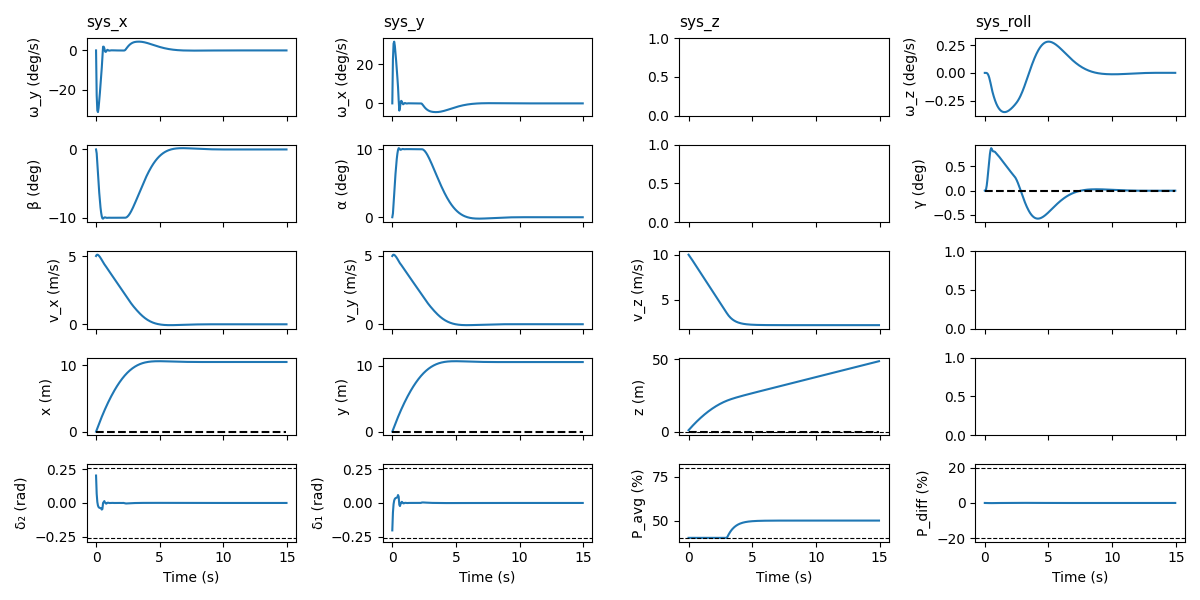

In [4]:
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl, Ref=ref[:,:-1], T_ol=t_ol[...,:-1], X_ol=x_ol, U_ol=u_ol); 
plot_static_states_inputs(t_cl[:-1], x_cl[:, :-1], u_cl, Ref=ref[:, :-1])

In [5]:
state_error = np.array(x_cl[:, -1]) - x_target
with np.printoptions(precision=6, suppress=True):
    print(f"angle vel error: {state_error[:3]}")
    print(f"angle error: {state_error[3:6]}")
    print(f"linear vel error: {state_error[6:9]}")

angle vel error: [ 0.000001 -0.000001  0.000007]
angle error: [-0.000002  0.000002 -0.000001]
linear vel error: [-0.000013 -0.000014  2.213818]


Maximum invariant set successfully computed after 4 iterations:
  Dimension: 3
Maximum invariant set successfully computed after 4 iterations:
  Dimension: 3
_setup_controller for z_vel
Maximum invariant set successfully computed after 44 iterations:
  Dimension: 2
Simulating time 0.00: 

c:\Users\linhp\miniforge3\envs\mpc2025\Lib\site-packages\cvxpy\problems\problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(



Simulating time 0.05: 
Simulating time 0.10: 
Simulating time 0.15: 
Simulating time 0.20: 
Simulating time 0.25: 
Simulating time 0.30: 
Simulating time 0.35: 
Simulating time 0.40: 
Simulating time 0.45: 
Simulating time 0.50: 
Simulating time 0.55: 
Simulating time 0.60: 
Simulating time 0.65: 
Simulating time 0.70: 
Simulating time 0.75: 
Simulating time 0.80: 
Simulating time 0.85: 
Simulating time 0.90: 
Simulating time 0.95: 
Simulating time 1.00: 
Simulating time 1.05: 
Simulating time 1.10: 
Simulating time 1.15: 
Simulating time 1.20: 
Simulating time 1.25: 
Simulating time 1.30: 
Simulating time 1.35: 
Simulating time 1.40: 
Simulating time 1.45: 
Simulating time 1.50: 
Simulating time 1.55: 
Simulating time 1.60: 
Simulating time 1.65: 
Simulating time 1.70: 
Simulating time 1.75: 
Simulating time 1.80: 
Simulating time 1.85: 
Simulating time 1.90: 
Simulating time 1.95: 
Simulating time 2.00: 
Simulating time 2.05: 
Simulating time 2.10: 
Simulating time 2.15: 
Simulating

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=299, step=2), IntSlider(value=0…

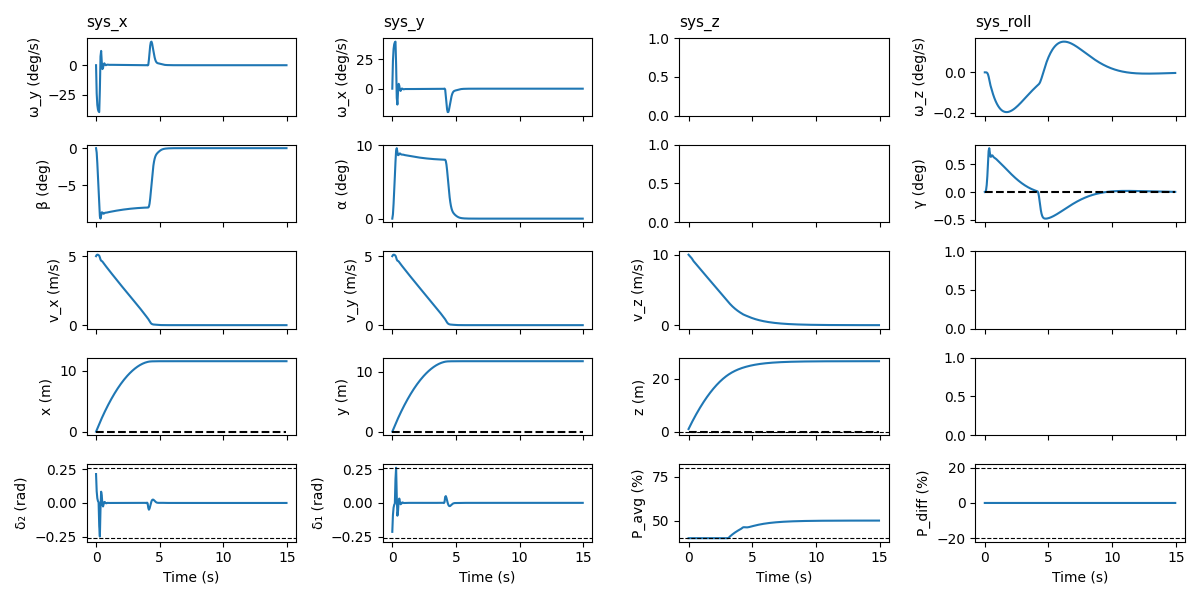

In [6]:
### Part 5 -- Offset - Free

from LinearMPC_5_1_OffsetFree.MPCVelControl import MPCVelControl

Ts = 0.05
sim_time = 15
H = 5.0
x0 = np.array([0, 0, 0, 0, 0, 0, 5, 5, 10, 0, 0, 1])  # initial state
x_target = np.zeros((12,))

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

# Static mass change and zero fuel rate
rocket.mass = 1.5
rocket.fuel_rate = 0.0
t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, ref = rocket.simulate_control(mpc, sim_time, H, x0, x_target=x_target, method='nonlinear')

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl, Ref=ref[:,:-1], T_ol=t_ol[...,:-1], X_ol=x_ol, U_ol=u_ol); 
plot_static_states_inputs(t_cl[:-1], x_cl[:, :-1], u_cl, Ref=ref[:, :-1])

In [7]:
state_error = np.array(x_cl[:, -1]) - x_target
with np.printoptions(precision=6, suppress=True):
    print(f"the angle vel error {state_error[:3]}")
    print(f"the angle error {state_error[3:6]}")
    print(f"The Linear vel error {state_error[6:9]}")


the angle vel error [-0.        0.       -0.000052]
the angle error [ 0.       -0.        0.000039]
The Linear vel error [0.       0.       0.001537]
